# Train character embeddings using word2vec skipgram approach 

We look at ith character and try to predict (i-1) and (i+1) character

In [16]:
#for inline plotting in notebooks
%matplotlib inline  

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Get data

In [4]:
# load data
path = "./../data/harry_potter_3.txt"
text = open(path).read()

corpus_length = len(text)

print('corpus length:', corpus_length)

('corpus length:', 626260)


In [5]:
unique_chars = list(set(text))
print('total no of unique chars:', len(unique_chars))

print "\nSet of characters : \n" + str(unique_chars)

('total no of unique chars:', 80)

Set of characters : 
['\n', '\r', '!', ' ', '"', "'", '&', ')', '(', '*', '-', ',', '.', '1', '0', '3', '2', '5', '4', '7', '6', '9', ';', ':', '?', 'A', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'J', 'M', 'L', 'O', 'N', 'Q', 'P', 'S', 'R', 'U', 'T', 'W', 'V', 'Y', 'X', 'Z', '\\', '_', 'a', '`', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 'p', 's', 'r', 'u', 't', 'w', 'v', 'y', 'x', 'z']


In [6]:
def classToOneHot(item, classes):

	x = [0. for _ in classes]
	
	x[classes.index(item)] = 1.

	return x

In [8]:
classToOneHot('a', unique_chars)

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [20]:
def findClosest(labels, coords, n=3):
	def dist(p1, p2):
		return np.linalg.norm(np.array(p1)-np.array(p2))
	for label, pos in zip(labels, coords):
		print(label)
		dists = []
		for l2, p2 in zip(labels, coords):
			if l2==label: continue
			dists.append((l2, dist(pos, p2)))
		dists = sorted(dists, key=lambda x : x[1])
		if n == -1:
			if dists[0][1] >= 0.2:
				print("\t{}\t{}".format(dists[0][0], dists[0][1]))
			else:
				for d in dists:
					if d[1] <= 0.15:
						print("\t{}\t{}".format(d[0], d[1]))
		else:		
			for d in dists[:n]:
				print("\t{}\t{}".format(d[0], d[1]))

In [11]:
# prepare training data X, y
# both X,y are are characters 

skip_window = 1 # how much we see on either side of center word
global_index = skip_window # 

X = []
y = []

for i in range(global_index, (corpus_length - skip_window)):

    #print i
    
    X_char = text[i]
    y1_char = text[i-1]
    y2_char = text[i+1]
    
    #print X_char
    #print y1_char, y2_char
    X.append(classToOneHot(X_char, unique_chars))
    yp=[classToOneHot(y1_char, unique_chars), classToOneHot(y2_char, unique_chars)] 
    
    y.append(yp)
    
    
    

In [14]:
nb_cols = len(y[0])
y_cols = [np.array([v[i] for v in y], np.float32) for i in range(nb_cols)]

input_layer = Input(shape=(len(unique_chars),))
encoding = Dense(2, activation='linear')(input_layer)

output_1 = Dense(len(unique_chars), activation='softmax')(encoding)
output_2 = Dense(len(unique_chars), activation='softmax')(encoding)

model = Model(input=[input_layer], output=[output_1, output_2])#, output_3, output_4])

encoder = Model(input = [input_layer], output=[encoding])

# when using larger windows, remember to add more loss weights
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', loss_weights=[0.5, 0.5])

model.fit(X, y_cols, nb_epoch=15, batch_size=1024, shuffle=True, verbose=True)

/Users/admin/.virtualenvs/Representation-Learning-for-NLP/lib/python2.7/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  '` call to the Keras 2 API: ' + signature)
/Users/admin/.virtualenvs/Representation-Learning-for-NLP/lib/python2.7/site-packages/keras/engine/training.py:1393: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/15
626258/626258 [==============================] - 8s - loss: 3.7363 - dense_2_loss: 3.7488 - dense_3_loss: 3.7237     
Epoch 2/15
626258/626258 [==============================] - 7s - loss: 3.1642 - dense_2_loss: 3.1664 - dense_3_loss: 3.1620     
Epoch 3/15
626258/626258 [==============================] - 8s - loss: 3.0433 - dense_2_loss: 3.0331 - dense_3_loss: 3.0536     
Epoch 4/15
626258/626258 [==============================] - 8s - loss: 2.9601 - dense_2_loss: 2.9552 - dense_3_loss: 2.9650     
Epoch 5/15
626258/626258 [==============================] - 7s - loss: 2.9159 - dense_2_loss: 2.9280 - dense_3_loss: 2.9038     
Epoch 6/15
626258/626258 [==============================] - 7s - loss: 2.8916 - dense_2_loss: 2.9186 - dense_3_loss: 2.8647     
Epoch 7/15
626258/626258 [==============================] - 8s - loss: 2.8755 - dense_2_loss: 2.9136 - dense_3_loss: 2.8375     
Epoch 8/15
626258/626258 [==============================] - 8s - loss: 2.8624 - dense_2_loss: 2.9

In [15]:
x2 = [classToOneHot(ch, unique_chars) for ch in unique_chars[:-1]]
encodings = encoder.predict(np.array(x2))
for ch, e in zip(unique_chars[:-1], encodings):
    print("{}\t{}\t{}".format(ch, e[0], e[1]))


	-0.468151211739	0.823179960251
	3.06237673759	2.91550040245
!	1.10014104843	1.1257365942
 	-1.22371268272	-1.37709331512
"	0.685322999954	1.03643763065
'	0.485717982054	-0.912403285503
&	0.850472331047	-0.596755325794
)	2.01857948303	-0.305299520493
(	0.715848922729	-1.02044796944
*	0.655248224735	-0.36414000392
-	0.637157440186	0.39775621891
,	2.11008024216	0.955996751785
.	1.81680524349	1.35787987709
1	0.547343671322	-0.0717134475708
0	0.887421071529	-0.614003777504
3	1.00074422359	-0.625247955322
2	0.420156061649	-0.657543540001
5	0.736979186535	-0.702464103699
4	0.713426113129	-0.736155152321
7	0.638860881329	-1.01485013962
6	0.962716400623	-0.834955632687
9	0.691559255123	-0.615119814873
;	2.40671300888	0.47575545311
:	1.41838479042	-0.0559958219528
?	1.02469182014	1.08592438698
A	0.694646835327	-0.522182226181
C	0.981419503689	-1.86005985737
B	1.21872913837	-2.11576938629
E	0.536222100258	0.0249113440514
D	1.11715233326	-2.15840625763
G	1.30527329445	-2.20038676262
F	1.26541399



	"	1.17302238941
	-	1.18435323238

	.	1.99439966679
	,	2.17865157127
!
	?	0.0853088349104
	"	0.42432102561
 
	O	1.68579626083
	N	1.75950944424
"
	?	0.342957913876
	!	0.42432102561
'
	7	0.184250116348
	i	0.186912685633
&
	0	0.0407764464617
	3	0.152949243784
)
	I	0.444941490889
	:	0.649912297726
(
	i	0.0699118226767
	7	0.077191285789
*
	U	0.127925857902
	A	0.16287907958
-
	E	0.3862657547
	1	0.477983534336
,
	.	0.497514098883
	;	0.564466774464
.
	,	0.497514098883
	!	0.753324687481
1
	E	0.0972627326846
	X	0.164102837443
0
	&	0.0407764464617
	3	0.113879621029
3
	0	0.113879621029
	&	0.152949243784
2
	`	0.18566018343
	'	0.263157486916
5
	4	0.0411075912416
	K	0.0954831689596
4
	5	0.0411075912416
	K	0.0544529929757
7
	i	0.0121862376109
	(	0.077191285789
6
	\	0.0557214766741
	_	0.153291583061
9
	`	0.0895241498947
	A	0.0929888635874
;
	,	0.564466774464
	)	0.872178018093
:
	e	0.527898609638
	)	0.649912297726
?
	!	0.0853088349104
	"	0.342957913876
A
	9	0.0929888635874
	`	0.135528936982
C
	S	0.114

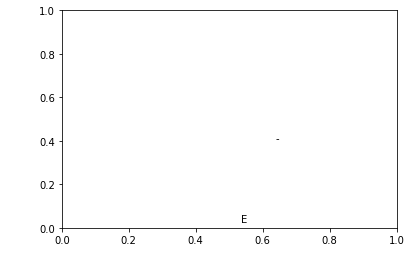

In [23]:
labels = unique_chars[:-1]
xd = [e[0] for e in encodings]
yd = [e[1] for e in encodings]
fig, ax = plt.subplots()
for i, txt in enumerate(labels):
    _ = ax.annotate(txt, (xd[i],yd[i]))


findClosest(labels, encodings, n=2)

plt.show()